In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/auctions_cata.csv')
df.head()

,auction_id,bid,buyout,unit_price,quantity,time_left,item_id,item_name,quality,item_class,...,purchase_price_gold,required_level,item_level,sell_price_gold,first_appearance_timestamp,first_appearance_year,first_appearance_month,first_appearance_day,first_appearance_hour,hours_on_sale
0,1240844788,50.0000,50.0000,50.000000,1,0.5,43418,Glyph of Heroic Throw,Common,Glyph,...,0,25,25,0,2024-06-23 15:00:00,2024,6,23,15,1
1,1240844884,75.0000,75.0000,75.000000,1,0.5,43413,Glyph of Rapid Charge,Common,Glyph,...,0,25,25,0,2024-06-23 15:00:00,2024,6,23,15,1
2,1240891138,114.9500,121.0000,120.999603,1,0.5,55822,Heavy Geode Mace,Rare,Weapon,...,108,81,316,21,2024-06-23 15:00:00,2024,6,23,15,1
3,1240898677,6.7499,7.1051,7.105100,1,0.5,52985,Azshara's Veil,Common,Trade Goods,...,0,0,82,0,2024-06-23 15:00:00,2024,6,23,15,1
4,1240898680,6.7499,7.1051,7.105100,1,0.5,52985,Azshara's Veil,Common,Trade Goods,...,0,0,82,0,2024-06-23 15:00:00,2024,6,23,15,1


In [3]:
numerical = ['bid', 'buyout', 'unit_price', 'quantity', 'time_left', 'hours_on_sale']
categorical = ['quality', 'item_class', 'item_subclass', 'is_stackable']

We start with descriptive statistics of the numerical columns

In [4]:
df[numerical].describe()

,bid,buyout,unit_price,quantity,time_left,hours_on_sale
count,422365.000000,422365.000000,422365.000000,422365.000000,422365.000000,422365.000000
mean,236.495055,490.884365,428.344601,5.688397,44.531068,30.663786
std,2961.717424,3789.135976,2907.187636,9.936961,10.814172,20.482409
min,0.000100,0.000000,0.000000,1.000000,0.500000,1.000000
25%,8.672600,9.998000,1.999900,1.000000,48.000000,17.000000
50%,37.673200,40.999000,14.999900,1.000000,48.000000,26.000000
75%,133.000000,150.729000,126.703598,7.000000,48.000000,49.000000
max,307150.000000,307150.000000,200000.000000,250.000000,48.000000,165.000000


Explore the data distribution of some variables

[]

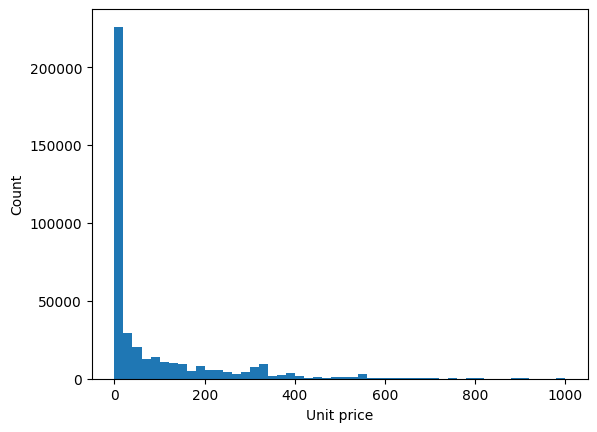

In [5]:
plt.hist(df.query('unit_price < 1000').unit_price, bins=50)
plt.xlabel('Unit price')
plt.ylabel('Count')
plt.plot()

This shows the unit price is from exponential distribution not a power law

[]

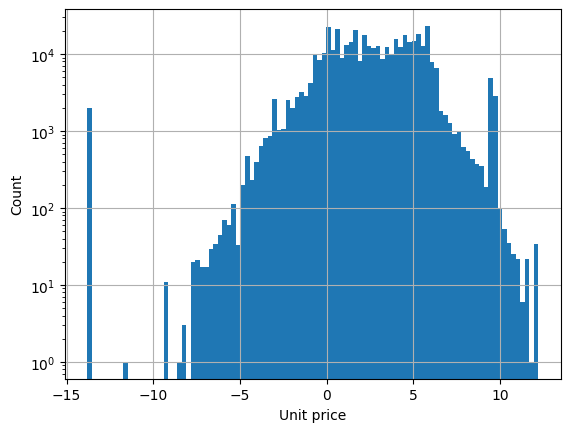

In [6]:
plt.hist(np.log(df.unit_price + 1e-6), log=True, bins=100)
plt.grid()
plt.xlabel('Unit price')
plt.ylabel('Count')
plt.plot()

[]

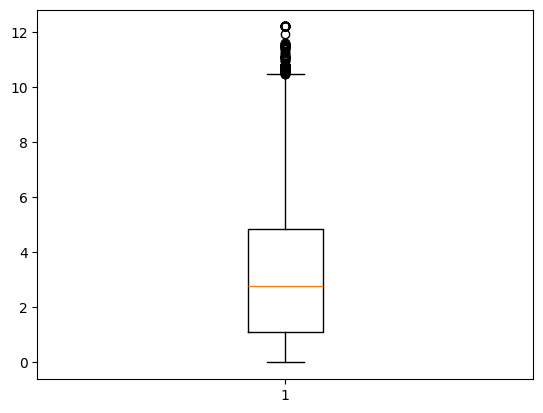

In [7]:
plt.boxplot(np.log1p(df.unit_price + 1e-8))
plt.plot()

We apply log to prices

In [8]:
#df['bid'] = np.log(df['bid'] + 1e-6)
#df['buyout'] = np.log(df['buyout'] + 1e-6)
#df['unit_price'] = np.log(df['unit_price'] + 1e-6)

df['bid'] = np.log1p(df['bid'])
df['buyout'] = np.log1p(df['buyout'])
df['unit_price'] = np.log1p(df['unit_price'])

In [9]:
df[numerical].describe()

,bid,buyout,unit_price,quantity,time_left,hours_on_sale
count,422365.000000,422365.000000,422365.000000,422365.000000,422365.000000,422365.000000
mean,3.551142,3.730640,3.089176,5.688397,44.531068,30.663786
std,1.787902,1.917335,2.189175,9.936961,10.814172,20.482409
min,0.000100,0.000000,0.000000,1.000000,0.500000,1.000000
25%,2.269297,2.397713,1.098579,1.000000,48.000000,17.000000
50%,3.655147,3.737646,2.772582,1.000000,48.000000,26.000000
75%,4.897840,5.022096,4.849712,7.000000,48.000000,49.000000
max,12.635095,12.635095,12.206078,250.000000,48.000000,165.000000


Let's analyze hours on sale

[]

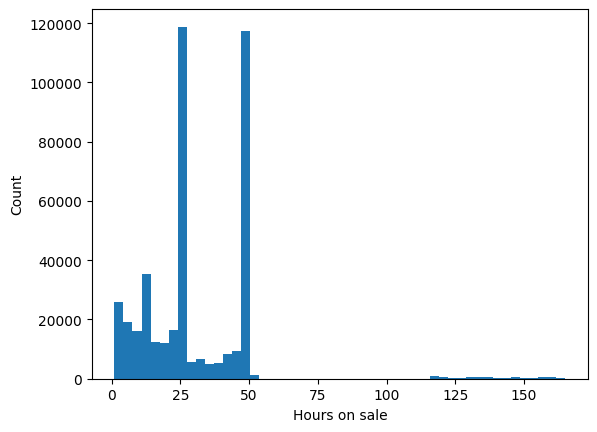

In [10]:
plt.hist(df.hours_on_sale, bins=50)
plt.xlabel('Hours on sale')
plt.ylabel('Count')
plt.plot()

In [18]:
df.query('hours_on_sale > 100')['hours_on_sale'].count()

6192

[]

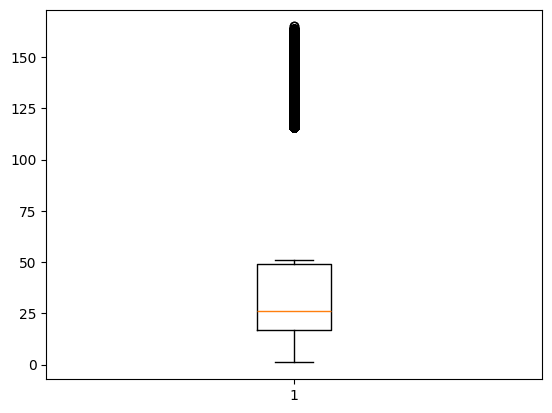

In [19]:
plt.boxplot(df.hours_on_sale)
plt.plot()

We detected outliers, we remove them

[]

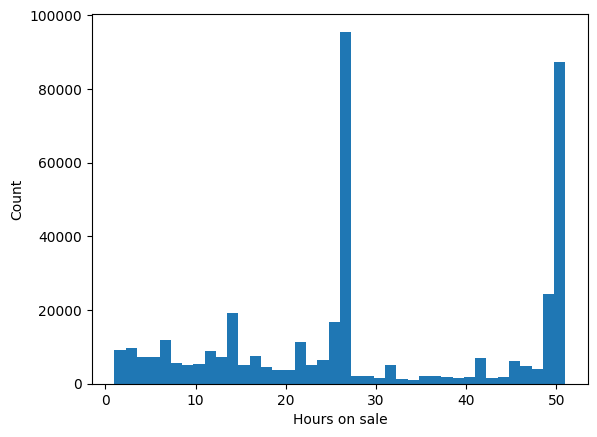

In [20]:
df = df.query('hours_on_sale < 100')

plt.hist(df.hours_on_sale, bins=40)
plt.xlabel('Hours on sale')
plt.ylabel('Count')
plt.plot()

[]

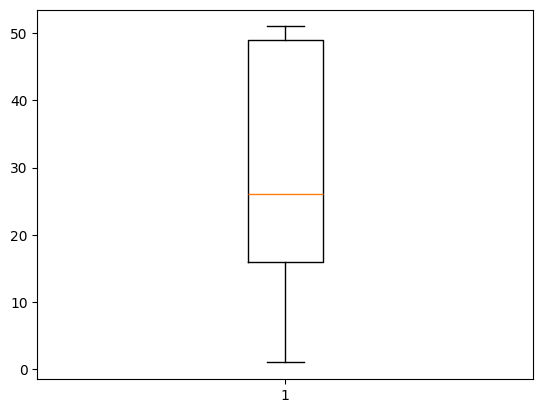

In [21]:
plt.boxplot(df.hours_on_sale)
plt.plot()

[]

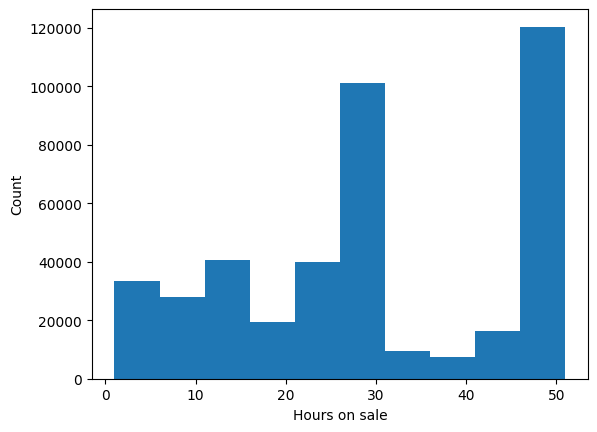

In [49]:
plt.hist(df.hours_on_sale, bins=10)
plt.xlabel('Hours on sale')
plt.ylabel('Count')
plt.plot()

## Bivariate analysis

<Axes: >

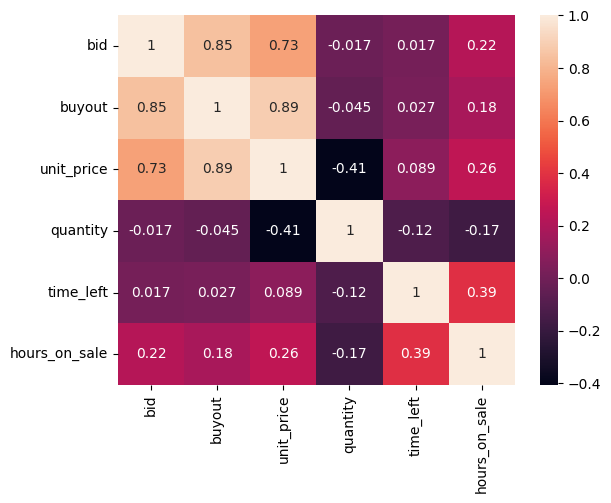

In [16]:
sns.heatmap(df[numerical].corr(), annot=True)

Text(0, 0.5, 'Hours on sale')

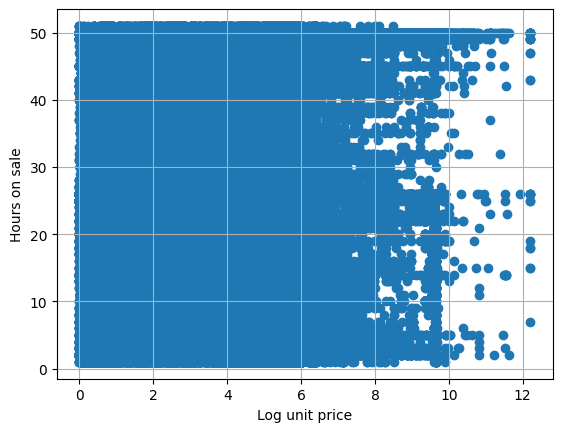

In [17]:
plt.scatter(df.unit_price, df.hours_on_sale)

plt.grid()
plt.xlabel('Log unit price')
plt.ylabel('Hours on sale')

In [ ]:
sns.set_theme(style="ticks")

sns.pairplot(df[numerical])